**Simple Linear Regression**

In [45]:
# Step 1: Import necessary libraries
import numpy as np  # For handling numerical data
import matplotlib.pyplot as plt  # For data visualization
from sklearn.linear_model import LinearRegression  # For building the regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For evaluating the model
import statsmodels.api as sm  # For OLS (Ordinary Least Squares) Regression
from sklearn.preprocessing import PolynomialFeatures  # For polynomial transformation
 

In [2]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)  # Ensuring reproducibility of random noise
 
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

In [3]:
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

In [47]:
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

In [4]:
#Step 3:Create a linear Regression model
model=LinearRegression() #Initialize the model

In [15]:
#Step 4:Train the model using model.fit(X,Y)
model.fit(X,Y)

LinearRegression()

In [18]:
#Step 5:Calculate the coefficient and intercept
slope=model.coef_[0] #initialize and print the slope/coefficient 
print(slope)

4.965498141580591


In [19]:
#Calculate the intercept
intercept=model.intercept_ #initialize and print the intercept
print(intercept)

27.430065779800536


In [20]:
#Display the equation of the line
print(f"Equation of the line y={slope:.2f}X +{intercept:.2f}")


Equation of the line y=4.97X +27.43


In [21]:
#Step 7: Predict values using the model
Y_pred=model.predict(X) #predict salaries for the given experience values

**Model Evaluation Metrics**-WE WILL CALCULATE EFFICIENCY ALONG WITH ERRORS

In [24]:
#1.mean_squared Error(MSE)- Measures average squared difference between actual and predicted values
mse=mean_squared_error(Y,Y_pred)
print(f"Mean Squared Error (MSE):{mse:.2f}")

Mean Squared Error (MSE):11.75


In [26]:
#2.mean_absolute Error(MAE) - Measures absolute difference between actual and predicted values
mae=mean_absolute_error(Y,Y_pred)
print(f"Mean absolute Error (MAE):{mae:.2f}")

Mean absolute Error (MAE):2.87


In [28]:
#3.Root Mean Squared Error(RMSE) - Measures standard deviation of residuals(errors)
rmse=np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE):{rmse:.2f}")

Root Mean Squared Error (RMSE):3.43


In [32]:
#4.R=squared error - Represents how well the model fits the data ( 0 -1 , where 1 is the best)
r2=r2_score(Y,Y_pred)
print(f"R-squared error:{r2:.2f}")

R-squared error:0.95


In [33]:
#5.Adjusted R-squared - Adjusted for the predictors,better for multiple regressions
n=len(Y) #Number of observations
p=1 #Number of independent variables(experience)
adj_r2=1-((1-r2) * (n-1) / (n-p-1))
print(f"Adjusted R-squared:{adj_r2:.2f}")

Adjusted R-squared:0.94


In [48]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:08:40   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\CVR\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


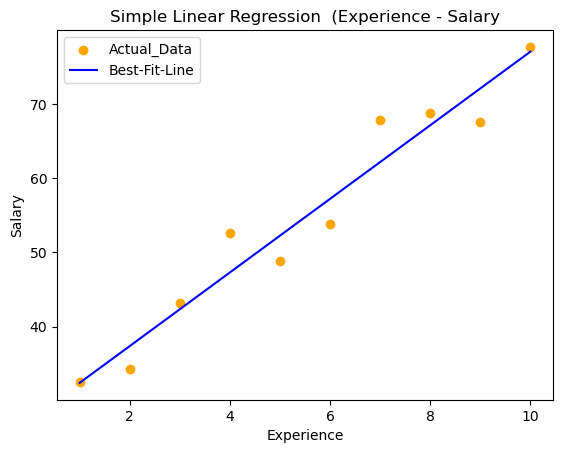

In [39]:
#STEP 8: Plot the actual data points
plt.scatter(X,Y,color='orange',label='Actual_Data')  #Scatter plot of actual values

#Step 9:Plot the regression line(Best-Fit Line) 
plt.plot(X,Y_pred,color='blue',label='Best-Fit-Line') # Regression line

#Step 10:Add labels and Legend
plt.title("Simple Linear Regression  (Experience - Salary") #Label the Title
plt.xlabel("Experience") #label x-axis
plt.ylabel("Salary") #label y-axis
plt.legend()

#Display the graph
plt.show()

In [43]:
while True:
    try:
        experience=float(input("Enter the years of experience(or enter -1):"))
        if experience==-1:
            break
        experience_poly = poly.transform(np.array([[experience]]))
        predicted_salary=model.predict(np.array([[experience_poly]]))[0]
        print(f"Predicted salary for {experience} years of experience is ${predicted_salary:.2f}k")
    except ValueError:
        print("Please enter a valid number")
    


Enter the years of experience(or enter -1):2
Predicted salary for 2.0 years of experience is $37.36k
Enter the years of experience(or enter -1):-1
